In [1]:
import pandas as pd

In [2]:
dsf = pd.read_csv("output.csv")

In [3]:
dsf

,content,annotation.notes,annotation.label,extras
0,Get fucking real dude.,NaN,1,NaN
1,She is as dirty as they come and that crook ...,NaN,1,NaN
2,why did you fuck it up. I could do it all day...,NaN,1,NaN
3,Dude they dont finish enclosing the fucking s...,NaN,1,NaN
4,WTF are you talking about Men? No men thats n...,NaN,1,NaN
...,...,...,...,...
19996,I dont. But what is complaining about it goi...,NaN,0,NaN
19997,Bahah yeah i&;m totally just gonna&; get pis...,NaN,0,NaN
19998,hahahahaha >:) im evil mwahahahahahahahahaha,NaN,0,NaN
19999,What&;s something unique about Ohio? :),NaN,0,NaN


In [4]:
dsf.drop("annotation.notes",axis=1,inplace=True)

In [6]:
dsf.drop("extras",axis=1,inplace=True)

In [11]:
dsf

,content,annotation.label
0,Get fucking real dude.,1
1,She is as dirty as they come and that crook ...,1
2,why did you fuck it up. I could do it all day...,1
3,Dude they dont finish enclosing the fucking s...,1
4,WTF are you talking about Men? No men thats n...,1
...,...,...
19996,I dont. But what is complaining about it goi...,0
19997,Bahah yeah i&;m totally just gonna&; get pis...,0
19998,hahahahaha >:) im evil mwahahahahahahahahaha,0
19999,What&;s something unique about Ohio? :),0


In [18]:
import pandas as pd
data = pd.read_csv("final_dataset.csv")

In [20]:
data

,text_content,labels
0,Get fucking real dude.,1
1,She is as dirty as they come and that crook ...,1
2,why did you fuck it up. I could do it all day...,1
3,Dude they dont finish enclosing the fucking s...,1
4,WTF are you talking about Men? No men thats n...,1
...,...,...
19996,I dont. But what is complaining about it goi...,0
19997,Bahah yeah i&;m totally just gonna&; get pis...,0
19998,hahahahaha >:) im evil mwahahahahahahahahaha,0
19999,What&;s something unique about Ohio? :),0


In [22]:
print(data.loc[4])

text_content     WTF are you talking about Men? No men thats n...
labels                                                          1
Name: 4, dtype: object


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20001 entries, 0 to 20000
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   text_content  20001 non-null  object
 1   labels        20001 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 312.6+ KB


In [28]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import pandas as pd
import re
import nltk

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Load dataset
df = pd.read_csv("final_dataset.csv")

# Define preprocessing function
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove special characters, numbers, and punctuation
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenize text
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # Lemmatize tokens
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    # Join tokens back into a single string
    return ' '.join(tokens)

# Apply preprocessing
df['cleaned_text'] = df['text_content'].apply(preprocess_text)

# Define features and labels
X = df['cleaned_text']
y = df['labels']

# Convert text to numerical features using TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(X)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Now you can use X_train_resampled and y_train_resampled to train your model


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dinesh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dinesh\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Dinesh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Define models
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression()
}

# Train and evaluate each model
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train_resampled, y_train_resampled)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Print evaluation metrics
    print(f"Accuracy for {name}: {accuracy_score(y_test, y_pred)}")
    print(f"Classification report for {name}:\n{classification_report(y_test, y_pred)}\n")


Training Decision Tree...
Accuracy for Decision Tree: 0.849537615596101
Classification report for Decision Tree:
              precision    recall  f1-score   support

           0       0.97      0.78      0.86      2424
           1       0.74      0.96      0.83      1577

    accuracy                           0.85      4001
   macro avg       0.85      0.87      0.85      4001
weighted avg       0.88      0.85      0.85      4001


Training Random Forest...
Accuracy for Random Forest: 0.8830292426893277
Classification report for Random Forest:
              precision    recall  f1-score   support

           0       0.97      0.83      0.90      2424
           1       0.79      0.96      0.87      1577

    accuracy                           0.88      4001
   macro avg       0.88      0.90      0.88      4001
weighted avg       0.90      0.88      0.88      4001


Training KNN...
Accuracy for KNN: 0.514621344663834
Classification report for KNN:
              precision    recall 

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, accuracy_score
# Build the ANN model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_resampled.shape[1],)),
    Dropout(0.5),  # Prevent overfitting
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Use sigmoid for binary classification
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_resampled, y_train_resampled, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model on the test set
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Print evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

C:\Users\Dinesh\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
488/488 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.6464 - loss: 0.6283 - val_accuracy: 0.5607 - val_loss: 0.7631
Epoch 2/10
488/488 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.8730 - loss: 0.3226 - val_accuracy: 0.6427 - val_loss: 0.8120
Epoch 3/10
488/488 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9409 - loss: 0.1701 - val_accuracy: 0.6740 - val_loss: 0.8934
Epoch 4/10
488/488 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9664 - loss: 0.0984 - val_accuracy: 0.6722 - val_loss: 1.0481
Epoch 5/10
488/488 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9792 - loss: 0.0668 - val_accuracy: 0.7432 - val_loss: 0.7370
Epoch 6/10
488/488 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9839 - loss: 0.0514 - val_accuracy: 0.7255 - val_loss: 0.8146
Epoch 7/10
488/488 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.9855 - loss: 0.0412 - val_accuracy: 0.7255 - val_loss: 0.8507
Epoch 8/10
488/488 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9887 - loss: 0.0324 - val_accu

In [30]:
model.save('ann_model.h5')
import pickle
with open('tfidf_vectorizer.pkl', 'wb') as file:
    pickle.dump(vectorizer, file)


126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Accuracy: 0.9110222444388902
              precision    recall  f1-score   support

           0       0.96      0.89      0.92      2424
           1       0.85      0.94      0.89      1577

    accuracy                           0.91      4001
   macro avg       0.90      0.92      0.91      4001
weighted avg       0.92      0.91      0.91      4001



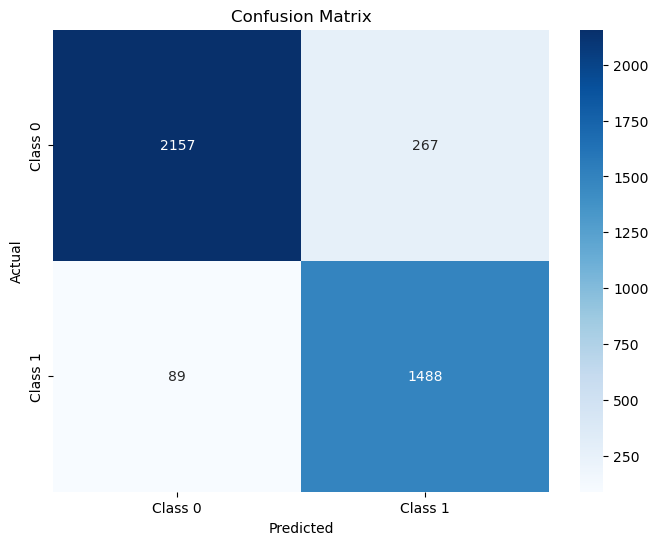

In [111]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# Evaluate the model on the test set
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Print evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [118]:
import gradio as gr
from tensorflow.keras.models import load_model
import numpy as np
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
import pickle

# Ensure NLTK resources are downloaded
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Load the trained model
model = load_model('ann_model.h5')  # Save your model as 'ann_model.h5' after training

# Load the vectorizer
with open('tfidf_vectorizer.pkl', 'rb') as file:
    vectorizer = pickle.load(file)  # Save your vectorizer as 'tfidf_vectorizer.pkl'

# Define text preprocessing function
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove special characters, numbers, and punctuation
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenize text
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # Lemmatize tokens
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    # Join tokens back into a single string
    return ' '.join(tokens)

# Define prediction function
def predict_sentiment(input_text):
    # Preprocess the input text
    cleaned_text = preprocess_text(input_text)
    # Convert text to numerical features using the vectorizer
    vectorized_text = vectorizer.transform([cleaned_text])
    # Predict using the ANN model
    prediction = model.predict(vectorized_text.toarray())
    # Map the prediction to a class
    label = "Cyber Bullying Detected" if prediction > 0.5 else "Cyber Bullying Not Detected"
    return f"Prediction: {label} (Confidence: {prediction[0][0]:.2f})"

# Create Gradio interface
interface = gr.Interface(
    fn=predict_sentiment,
    inputs=gr.Textbox(lines=3, placeholder="Enter your text here..."),
    outputs="text",
    title="Sentiment Analysis",
    description="Enter a piece of text to predict whether the sentiment is Positive or Negative.",
    examples=["I love this product!", "This is the worst experience ever."]
)

# Launch the Gradio app
interface.launch()


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dinesh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dinesh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Dinesh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


* Running on local URL:  http://127.0.0.1:7863

To create a public link, set `share=True` in `launch()`.
